In [39]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Import Dataset
anime_df = pd.read_csv("data/clean_anime.csv")
manga_df = pd.read_csv("data/clean_manga.csv")

##### Genre and Theme Analysis

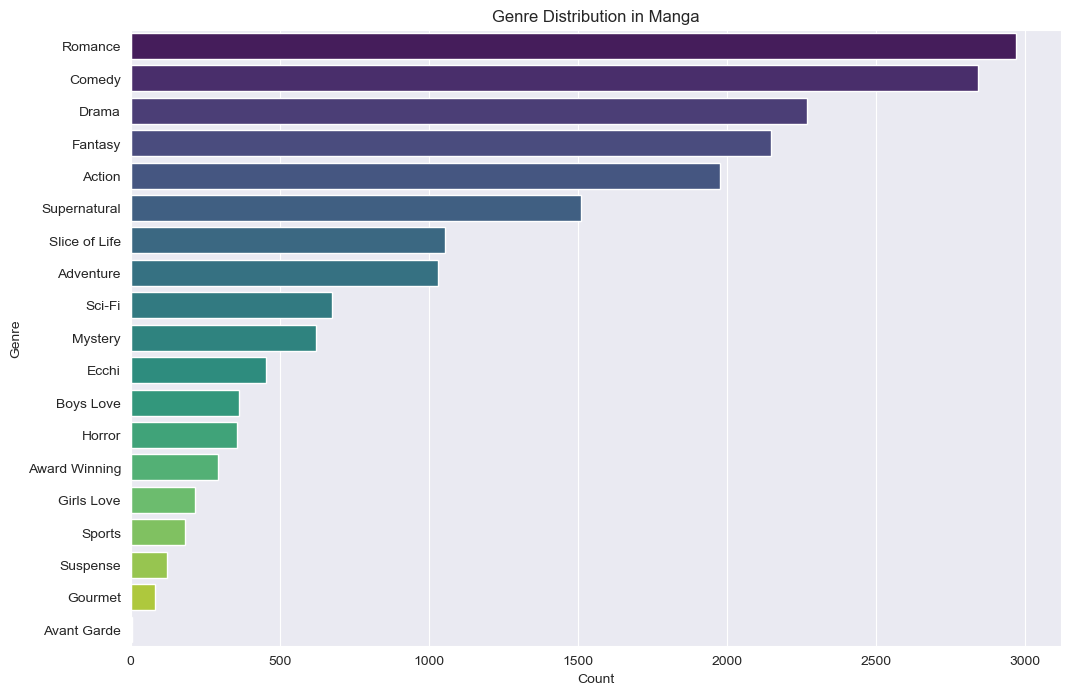

In [41]:
# Clean up the 'Genres' column (including removing empty strings)
manga_df['Genres'] = manga_df['Genres'].apply(lambda x: [genre.strip(" '[]") for genre in x.split(', ') if genre.strip()])

# Exclude rows with empty lists or containing only empty strings
manga_df = manga_df[manga_df['Genres'].apply(lambda x: len(x) > 0 and all(genre != '' for genre in x))]

# Split genres into separate rows
genres_split = manga_df['Genres'].explode()

# Plot the genre distribution
plt.figure(figsize=(12, 8))
sns.countplot(y=genres_split, order=genres_split.value_counts().index, palette='viridis')
plt.title('Genre Distribution in Manga')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

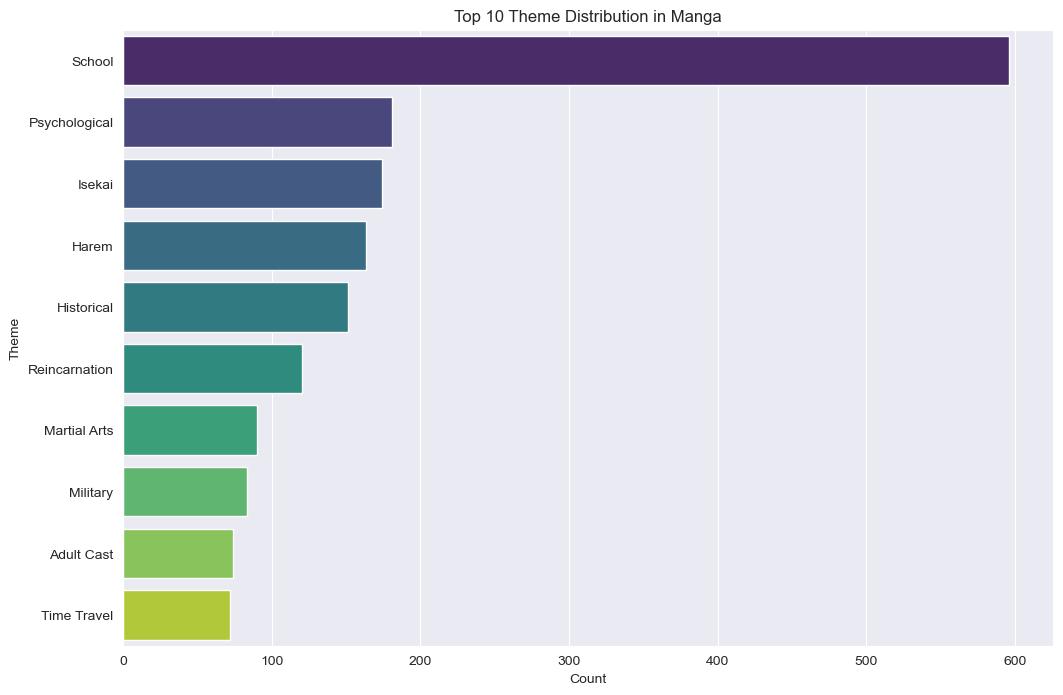

In [42]:
# Clean up the 'Themes' column (including removing empty strings)
manga_df['Themes'] = manga_df['Themes'].apply(lambda x: [theme.strip(" '[]") for theme in x.split(', ') if theme.strip()])

# Exclude rows with empty lists or containing only empty strings
manga_df = manga_df[manga_df['Themes'].apply(lambda x: len(x) > 0 and all(theme != '' for theme in x))]

# Split themes into separate rows
themes_split = manga_df['Themes'].explode()

# Get the top 10 most frequent themes
top_10_themes = themes_split.value_counts().head(10).index

# Plot the distribution of the top 10 themes
plt.figure(figsize=(12, 8))
sns.countplot(y=themes_split, order=top_10_themes, palette='viridis')
plt.title('Top 10 Theme Distribution in Manga')
plt.xlabel('Count')
plt.ylabel('Theme')
plt.show()